# Multiple Linear Regression
## Carbon Dioxide Emission of Cars vs Multiple Variables
EDX Machine Learning with Python: A Practical Introduction
Aaliyah Fiala
10/24/2020

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
#!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

In [3]:
df = pd.read_csv("FuelConsumptionCo2.csv")

In [4]:
cdf = df [['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

<function matplotlib.pyplot.show(*args, **kw)>

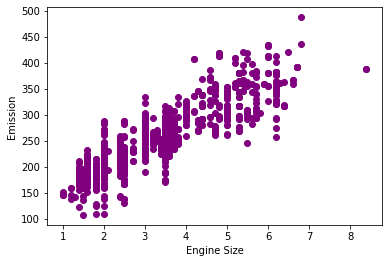

In [5]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='purple')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show

In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


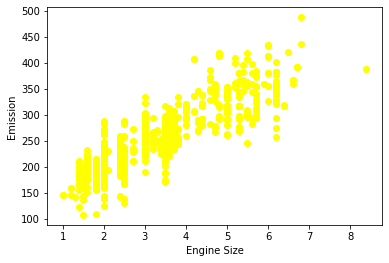

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='yellow')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.25367423  7.62821161  9.40360007]]


In [9]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f" % np.mean((y_hat - y) ** 2))

#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' %regr.score(x, y))

Residual sum of squares: 474.85
Variance score: 0.87


In [18]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print('Coeffecients: ', regr.coef_)

Coeffecients:  [[11.33965282  7.22636447  6.14419316  2.95982587]]


In [19]:
y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("RSS: %.2f" % np.mean((y_hat - y) ** 2))

#Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' %regr.score(x, y))

RSS: 475.90
Variance score: 0.87
